In [20]:
import numpy as np
import pandas as pd

In [21]:
df= pd.read_csv("spam_ham_dataset.csv")

# 1. Data Cleaning


In [22]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [23]:
df.shape

(5171, 4)

In [24]:
data1 = df.drop(['Unnamed: 0', 'label'], axis=1,inplace=True)
data1 = df.rename(columns = {"label_num" : "Label"})
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   Label   5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [25]:
data1.head()

,text,Label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [26]:
df2 = pd.read_csv("SMS_test.csv")

In [27]:
df2.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose �500 - �75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [28]:
data2 = df2.drop(["S. No."], axis = 1,inplace =True)
data2 = df2.rename(columns = {"Message_body" : "text"})
data2["Label"] = [1 if i == "Spam" else 0 for i in data2["Label"]]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    125 non-null    object
 1   Label   125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [29]:
frames = [data1, data2]
data = pd.concat(frames)
data

,text,Label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear. You read something f...,0
122,Sun ah... Thk mayb can if dun have anythin on....,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5296 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5296 non-null   object
 1   Label   5296 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.1+ KB


In [31]:
data.sample(5)

,text,Label
4348,Subject: meter 0074\r\nliz or stacey - there i...,0
5075,"Subject: f . o . m . nomination eff . june 1 ,...",0
1079,"Subject: fw : txu gas distribution wallumrod ,...",0
248,"Subject: no more high rates\r\nhello ,\r\nwe t...",1
2973,"Subject: hpl nom for march 10 - 12 , 2001\r\n(...",0


In [32]:
data['Label'].value_counts()

0    3721
1    1575
Name: Label, dtype: int64

In [33]:
data.isnull().sum()

text     0
Label    0
dtype: int64

In [34]:
data.duplicated().sum()

179

In [35]:
data = data.drop_duplicates(keep='first')

In [36]:
data.shape

(5117, 2)

#  2.EDA

In [37]:
data['Label'].value_counts()

0    3580
1    1537
Name: Label, dtype: int64

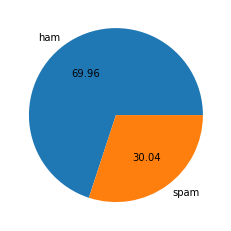

In [38]:
import matplotlib.pyplot as plt
plt.pie(data['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
data['num_characters'] = data['text'].apply(len)

<ipython-input-41-2009d4c05f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


In [42]:
data.head()

,text,Label,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [43]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-43-98c868618053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [44]:
data.head()

,text,Label,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [45]:
data['num_sentences']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-45-1d67abd884ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [46]:
data.head()

,text,Label,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [47]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5117.000000,5117.000000,5117.000000
mean,1046.400039,228.635919,13.049638
std,1535.975130,338.070179,26.610397
min,11.000000,2.000000,1.000000
25%,236.000000,51.000000,4.000000
50%,536.000000,121.000000,7.000000
75%,1230.000000,282.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [48]:
data[data['Label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3580.000000,3580.000000,3580.000000
mean,982.412849,227.631564,11.529050
std,1397.215736,335.601801,25.181986
min,18.000000,3.000000,1.000000
25%,230.000000,51.000000,4.000000
50%,531.500000,125.000000,6.000000
75%,1235.500000,294.250000,13.000000
max,32258.000000,8863.000000,1204.000000


In [49]:
data[data['Label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1537.000000,1537.000000,1537.000000
mean,1195.439818,230.975277,16.591412
std,1810.343982,343.849765,29.377099
min,11.000000,2.000000,1.000000
25%,253.000000,50.000000,4.000000
50%,545.000000,111.000000,9.000000
75%,1211.000000,239.000000,18.000000
max,22073.000000,3963.000000,577.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

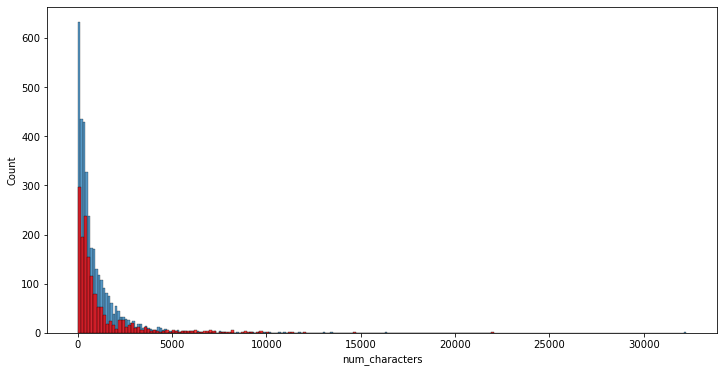

In [50]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data[data['Label'] == 0]['num_characters'])
sns.histplot(data[data['Label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

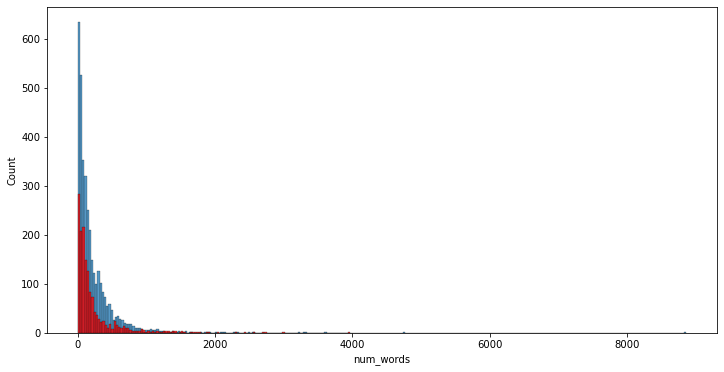

In [51]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data[data['Label'] == 0]['num_words'])
sns.histplot(data[data['Label'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

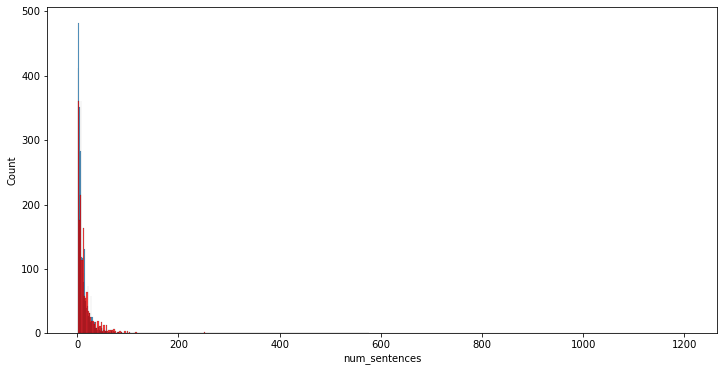

In [52]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data[data['Label'] == 0]['num_sentences'])
sns.histplot(data[data['Label'] == 1]['num_sentences'],color='red')

<AxesSubplot:>

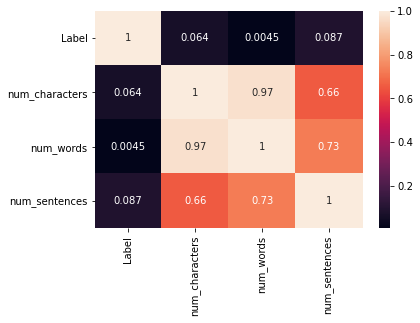

In [53]:
sns.heatmap(data.corr(),annot=True)

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [56]:
import string

 # 3. Data Preprocessing
1) Lower case

2) Tokenization 

3) Removing special characters 

4) Removing stop words and punctuation 

5) Stemming 

In [57]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
data['transformed_text'] = data['text'].apply(transform_text)

<ipython-input-58-a7714d3a0533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [59]:
data.head()

,text,Label,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [60]:
!pip install wordcloud

In [61]:
from wordcloud import WordCloud
wc = WordCloud(max_words = 2000,width=1600,height=800,min_font_size=10)

In [62]:
spam_wc = wc.generate(data[data['Label'] == 1]['transformed_text'].str.cat(sep=" "))

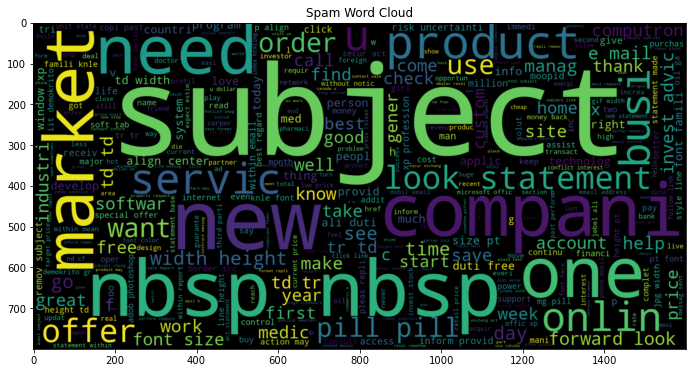

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc,interpolation = 'bilinear')
plt.title("Spam Word Cloud")
plt.show()

In [64]:
ham_wc = wc.generate(data[data['Label'] == 0]['transformed_text'].str.cat(sep=" "))

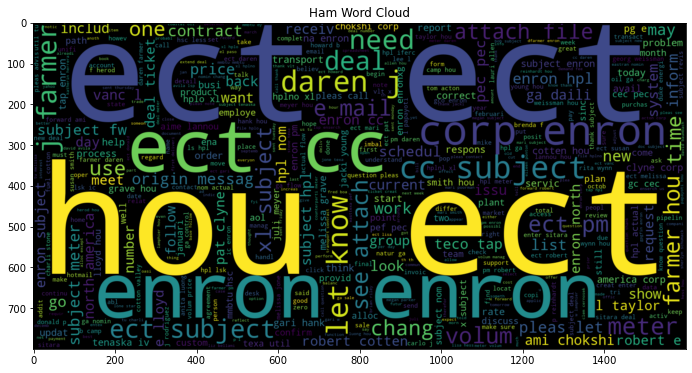

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc,interpolation = 'bilinear')
plt.title("Ham Word Cloud")
plt.show()

In [66]:
spam_corpus=[]
for msg in data[data['Label']==1]['transformed_text'].tolist():
      for word in msg.split():
            spam_corpus.append(word)

In [67]:
len(spam_corpus)

197796

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


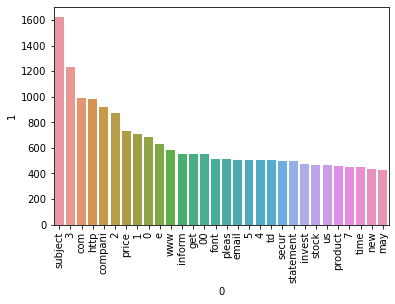

In [68]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
ham_corpus = []
for msg in data[data['Label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

380935

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


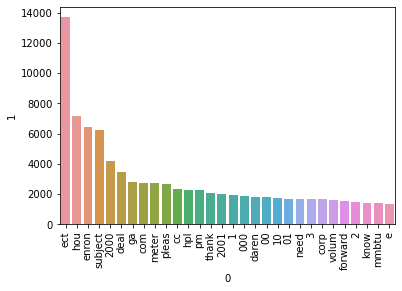

In [71]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building


In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [74]:
X.shape

(5117, 3000)

In [75]:
y = data['Label'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9560546875
[[689  23]
 [ 22 290]]
0.9265175718849841


In [81]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9482421875
[[674  38]
 [ 15 297]]
0.8865671641791045


In [82]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9345703125
[[666  46]
 [ 21 291]]
0.8635014836795252


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9736328125
[[696  16]
 [ 11 301]]
0.9495268138801262


In [85]:

knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9384765625
Precision -  0.9307958477508651
For  NB
Accuracy -  0.9345703125
Precision -  0.8635014836795252
For  DT
Accuracy -  0.8388671875
Precision -  0.6629711751662971
For  LR
Accuracy -  0.9501953125
Precision -  0.8990825688073395
For  RF
Accuracy -  0.9541015625
Precision -  0.9315960912052117
For  AdaBoost
Accuracy -  0.9462890625
Precision -  0.8905775075987842
For  BgC
Accuracy -  0.9404296875
Precision -  0.8861538461538462
For  ETC
Accuracy -  0.96875
Precision -  0.9545454545454546
For  GBDT
Accuracy -  0.9189453125
Precision -  0.9163636363636364


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.968750,0.954545
4,RF,0.954102,0.931596
0,KN,0.938477,0.930796
8,GBDT,0.918945,0.916364
3,LR,0.950195,0.899083
5,AdaBoost,0.946289,0.890578
6,BgC,0.940430,0.886154
1,NB,0.934570,0.863501
2,DT,0.838867,0.662971


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9736328125
Precision 0.9467084639498433


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer_11.pkl','wb'))
pickle.dump(bnb,open('spam_11.pkl','wb'))